In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import re
import nltk
nltk.download('punkt')
import tensorflow_hub as hub
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# load the dataset
data = pd.read_csv('dataset.csv')
data

,id,question,desired_answer,student_answer,score_me,score_other,score_avg
0,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,4.0,3.0,3.5
1,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,5.0,5.0
2,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,5.0,3.0,4.0
3,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,5.0,5.0
4,1.10,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,3.0,3.0
...,...,...,...,...,...,...,...
2711,12.11,How many steps does it take to search a node i...,The height of the tree.,"it takes at most h steps, where h is the heigh...",5.0,5.0,5.0
2712,12.11,How many steps does it take to search a node i...,The height of the tree.,actually i dont know,0.0,0.0,0.0
2713,12.11,How many steps does it take to search a node i...,The height of the tree.,height height height height height height height,0.0,0.0,0.0
2714,12.11,How many steps does it take to search a node i...,The height of the tree.,tree tree tree tree,0.0,0.0,0.0


In [ ]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    # remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # remove stopwords and lemmatize
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    text = ' '.join(tokens)
    return text

In [ ]:
# preprocess the data
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
X = np.array([embed([preprocess_text(str(q) + ' ' + str(a))]).numpy().flatten() for q, a in zip(data['question'], data['student_answer'])])
y = data['score_avg']
print("====================== Embeddings of pre-processed question & student answer =============================")
print(X)
print("====================== Data of score_avg =============================")
print(y)


====================== Embeddings of pre-processed question & student answer =============================
[[ 0.05768189  0.01441896 -0.03444666 ...  0.00758925  0.00898315
   0.02601086]
 [-0.0123023  -0.06516756  0.02217915 ... -0.028247    0.02213215
   0.00750732]
 [ 0.06155298 -0.02784809  0.03194202 ...  0.01315192  0.01880543
   0.0317981 ]
 ...
 [-0.04257369 -0.01115208  0.00029492 ... -0.01791414 -0.02747966
  -0.03977058]
 [-0.00857453 -0.01678239  0.03052462 ...  0.01601931 -0.06068902
  -0.01925499]
 [-0.02729181 -0.01601751  0.01836829 ...  0.05408085 -0.06122276
  -0.001444  ]]
====================== Data of score_avg =============================
0       3.5
1       5.0
2       4.0
3       5.0
4       3.0
       ... 
2711    5.0
2712    0.0
2713    0.0
2714    0.0
2715    0.5
Name: score_avg, Length: 2716, dtype: float64


In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#print the total size of the dataset

print(data.shape)

#print the training data shape size of the dataset which should be 75% of the total dataset

print(X_train.shape)
print(X_train.size)

#print the testing size of the dataset which should be 25% of the total dataset

print(X_test.shape)
print(X_test.size)


(2716, 7)
(2172, 512)
1112064
(544, 512)
278528


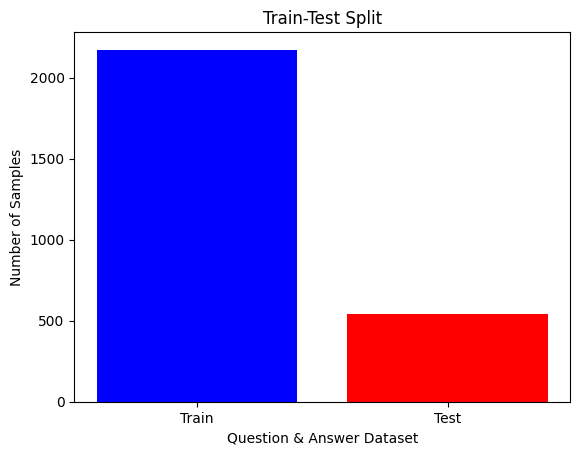

In [ ]:
#visualizing the train test split

# create a list with the sizes of each dataset
dataset_sizes = [X_train.shape[0], X_test.shape[0]]

# create a bar plot
plt.bar(['Train', 'Test'], dataset_sizes, color=['blue', 'red'])

# add axis labels and title
plt.xlabel('Question & Answer Dataset')
plt.ylabel('Number of Samples')
plt.title('Train-Test Split')

# display the plot
plt.show()


In [ ]:
# create the model and fit it to the training data
# model = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500, random_state=42)
# model.fit(X_train, y_train)
model = joblib.load('MLPregressor_tuned.joblib')

# evaluate the model on the testing set
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[ 5.3542404e+00  2.3024442e+00  2.1709762e+00  5.3079176e+00
  4.9556270e+00  2.1955364e+00  4.5116057e+00  2.5454042e+00
  5.7892251e+00  3.9019716e+00  4.9171562e+00  4.1317806e+00
  2.4966486e+00  4.6507335e+00  4.9306874e+00  1.4085621e-03
  4.6448493e+00  4.4761081e+00  5.0480866e+00  5.4773507e+00
  2.6859951e+00  1.0846441e+00  4.8806539e+00  3.7952316e+00
  3.8940105e+00  2.9564340e+00  4.5734868e+00  1.5370872e+00
  3.2198999e+00  2.9910378e+00  3.8271234e+00  4.9554715e+00
  2.8373070e+00  4.5126901e+00  5.7427540e+00  5.8567929e+00
  9.0179008e-01  4.8038816e+00  4.6738691e+00  2.9529569e+00
  4.8221431e+00  4.0214596e+00  3.2477450e+00  5.5934510e+00
  4.2276487e+00  3.9132953e+00  4.4968410e+00  2.1913939e+00
  1.0806006e+00  5.0818572e+00  4.4669905e+00  3.7431362e+00
  2.1431158e+00  1.7753296e+00  5.0050240e+00  4.0434098e+00
  2.7326903e+00  1.9387660e+00  8.1158292e-01  8.8581681e-01
  4.5567732e+00  3.7496774e+00  2.5541539e+00  4.3140144e+00
  4.4118862e+00  4.71651

R-squared: 0.8536602564248837
Mean absolute error: 0.24205208271194031
Mean squared error: 0.34465226415317
Root mean squared error: 0.5870709191853826


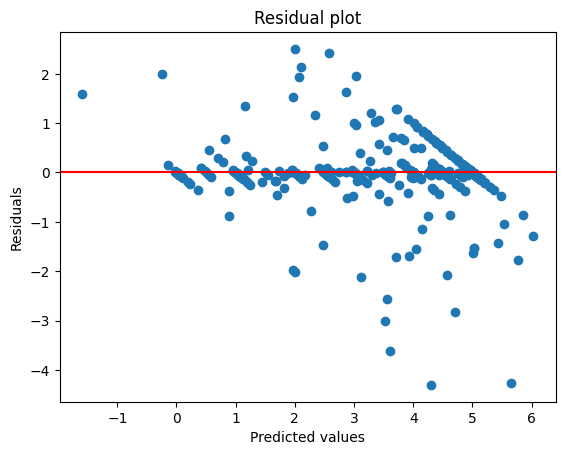

In [ ]:
# compute evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


# print evaluation metrics
print('R-squared:', r2)
print('Mean absolute error:', mae)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)

import matplotlib.pyplot as plt

# make predictions
y_pred = model.predict(X_test)

# calculate residuals
residuals = y_test - y_pred

# plot residuals
plt.scatter(y_pred, residuals, )
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()


In [ ]:
import joblib

#save the model
joblib.dump(model, 'MLPregressor.joblib')



['MLPregressor.joblib']

In [ ]:
#load the saved model
model = joblib.load('MLPregressor.joblib')


# deploy the model to production
def predict_relevance(question, desired_answer, student_answer):
    # preprocess the text
    question = preprocess_text(question)
    desired_answer = preprocess_text(desired_answer)
    student_answer = preprocess_text(student_answer)

    # concatenate question and student_answer texts
    input_text = question + ' ' + student_answer
    
    # encode input text using Universal Sentence Encoder
    input_emb = embed([input_text]).numpy().flatten()
    
    # predict the relevance score of the input text
    score = model.predict([input_emb])[0]
    print(score)
    # compute cosine similarity between desired_answer and student_answer texts
    similarity = cosine_similarity(embed([desired_answer]).numpy(), embed([student_answer]).numpy())[0][0]
    print("Cosine ", similarity)
    
    # adjust score based on similarity
    if similarity < 0.4:
        score -= 1
    elif similarity >= 0.4 and similarity < 0.8:
        score += 1
    else:
        score += 2
    
    # ensure score is between 0 and 5
    score = min(max(score, 0), 5)
    
    return score




In [ ]:

question = "What is the difference between an array declared as static, and one that is not?"
desired_answer = "The arrays declared as static live throughout the life of the program; that is, they are initialized only once, when the function that declares the array it is first called."
student_answer = "a static array will store the new values that were assigned to each of its elements. meaning if you call a function twice it will use the last values that were returned the first time.  if you don't declare it static then the new values will not be stored and will be reset to their original value"
new_answer = "adt adt adt adt adt adt"
newAnswer = "An array declared as static has a fixed size and retains its value between function calls, while a non-static array does not retain its value and its size can change during runtime."
print("=================== Irrelevant answers ==========================")
print(predict_relevance(question, desired_answer, new_answer))
print()
print(predict_relevance(question, desired_answer, "I don't know"))
print()
print(predict_relevance(question, desired_answer, "static one stays while non static one leaves"))
print()
print(predict_relevance(question, desired_answer, "one is memory allocated while other is storage allocated"))
print()
print(predict_relevance(question, desired_answer, "The static array is like a classic car that never goes out of style, while the non-static array is like a trendy new smartphone that quickly becomes outdated."))
print()
print(predict_relevance(question, desired_answer, "static array, non-static array, static array non-static array static array non-static array static array non-static array static array non-static array static array non-static array "))
print()
print(predict_relevance(question, desired_answer, "An array is something which starts with square brackets and all values inside it are seaperated by commas thats why it is static"))
print()
print(predict_relevance(question, desired_answer, "The static array is something that is not non static. Thats why it is called as static array."))
print()


print("=================== relevant answers ==========================")
print(predict_relevance(question, desired_answer, student_answer))
print()
print(predict_relevance(question, desired_answer, newAnswer))
print()
print(predict_relevance(question, desired_answer, "A static array persists throughout the lifetime of a program, while a non-static array is deallocated once it goes out of scope."))
print()
print(predict_relevance(question, desired_answer, "A static array is initialized to zero by default, while a non-static array has an undefined initial value unless explicitly initialized."))
print()
print(predict_relevance(question, desired_answer, "A static array can be accessed from any function within a file, while a non-static array is only accessible within the function in which it is declared."))
print()
print(predict_relevance(question, desired_answer, "A static array can be initialized only once, at compile time, while a non-static array can be initialized multiple times, including at runtime."))
print()
print(predict_relevance(question, desired_answer, "A static array can have a fixed size that is determined at compile time, while a non-static array can have a variable size that is determined at runtime."))
print()

=================== Irrelevant answers ==========================
0.62104267
Cosine  0.1465507
0

-0.02619116
Cosine  -0.016367882
0

1.8411591
Cosine  0.25346166
0.8411591053009033

1.0190631
Cosine  0.32066128
0.019063115119934082

3.1979375
Cosine  0.3012029
2.197937488555908

0.04081444
Cosine  0.5660637
1.0408144406974316

0.9968956
Cosine  0.50661194
1.9968956112861633

-0.02530238
Cosine  0.5675339
0.97469761967659

=================== relevant answers ==========================
4.9959164
Cosine  0.46199882
5

4.219353
Cosine  0.5833216
5

4.1393485
Cosine  0.7052151
5

5.2507143
Cosine  0.65075904
5

2.9608946
Cosine  0.6062121
3.9608945846557617

3.7986262
Cosine  0.67247796
4.798626184463501

4.2641196
Cosine  0.52879477
5

